## Data Preparation

In [1]:
import pandas as pd
Data = pd.read_csv(r"C:\Users\Neha\Downloads\datahomework2.csv")

In [2]:
Data['Amz_return']=Data['Amazon'].pct_change(fill_method='ffill')
Data['Apl_return']=Data['Apple'].pct_change(fill_method='ffill')
Data['Ebay_return']=Data['Ebay'].pct_change(fill_method='ffill')
Data['FB_return']=Data['Facebook'].pct_change(fill_method='ffill')
Data['Ggl_return']=Data['Google'].pct_change(fill_method='ffill')
Data['Twtr_return']=Data['Twitter'].pct_change(fill_method='ffill')

In [3]:
Data.head()

,Amazon,Apple,Ebay,Facebook,Google,Twitter,Amz_return,Apl_return,Ebay_return,FB_return,Ggl_return,Twtr_return
0,252.585,106.250000,23.457600,77.190002,519.500000,36.380001,NaN,NaN,NaN,NaN,NaN,NaN
1,245.488,106.260002,23.156700,76.150002,506.600006,37.279999,-0.028097,0.000094,-0.012827,-0.013473,-0.024832,0.024739
2,253.816,107.750000,23.116699,76.150002,505.200012,39.090000,0.033924,0.014022,-0.001727,0.000000,-0.002764,0.048552
3,256.030,111.889999,23.741699,78.175003,506.899994,40.169998,0.008723,0.038422,0.027037,0.026592,0.003365,0.027628
4,253.299,112.010002,23.413401,77.739998,500.700012,39.369999,-0.010667,0.001073,-0.013828,-0.005565,-0.012231,-0.019915


In [4]:
Data.shape

(799, 12)

In [6]:
from scipy.stats import gmean

In [7]:
sum(Data['Amz_return'][1:].isnull())

0

In [8]:
x1 = Data['Amz_return'].apply(lambda x:x+1)
x2= Data['Apl_return'].apply(lambda x:x+1)
x3 = Data['Ebay_return'].apply(lambda x:x+1)
x4 = Data['FB_return'].apply(lambda x:x+1)
x5 = Data['Ggl_return'].apply(lambda x:x+1)
x6 = Data['Twtr_return'].apply(lambda x:x+1)

In [10]:
meanv=[gmean(x1[1:])-1,gmean(x2[1:])-1,gmean(x3[1:])-1,gmean(x4[1:])-1,gmean(x5[1:])-1,\
      gmean(x6[1:])-1]
meanv

[0.0019877860467183428,
 0.00062571268551203651,
 0.00075472615818084066,
 0.0010881914696110329,
 0.00097360307069860319,
 -2.7863607830913573e-05]

In [64]:
import sys
sys.path
sys.path.insert(0,r'c:\users\neha\anaconda2\lib\site-packages (0.19.1)')
sys.path

['c:\\users\\neha\\anaconda2\\lib\\site-packages (0.19.1)',
 '',
 'C:\\Users\\Neha\\Anaconda2\\python27.zip',
 'C:\\Users\\Neha\\Anaconda2\\DLLs',
 'C:\\Users\\Neha\\Anaconda2\\lib',
 'C:\\Users\\Neha\\Anaconda2\\lib\\plat-win',
 'C:\\Users\\Neha\\Anaconda2\\lib\\lib-tk',
 'C:\\Users\\Neha\\Anaconda2',
 'C:\\Users\\Neha\\Anaconda2\\lib\\site-packages',
 'C:\\Users\\Neha\\Anaconda2\\lib\\site-packages\\PIL',
 'C:\\Users\\Neha\\Anaconda2\\lib\\site-packages\\Sphinx-1.5.6-py2.7.egg',
 'C:\\Users\\Neha\\Anaconda2\\lib\\site-packages\\win32',
 'C:\\Users\\Neha\\Anaconda2\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Neha\\Anaconda2\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Neha\\Anaconda2\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Neha\\.ipython']

In [13]:
Datamat = Data.iloc[1:,6:12]

covmat = Datamat.as_matrix()

covmat.shape

covar = np.cov(covmat.T)

covar

covdf=pd.DataFrame(covar,columns=['Amzn','Apl','Ebay','FB','Ggl','Twttr'])

In [19]:
covdf

,Amzn,Apl,Ebay,FB,Ggl,Twttr
0,0.000407,0.000005,0.000012,-0.000011,0.000007,-0.000095
1,0.000005,0.000211,0.000060,0.000069,0.000060,0.000040
2,0.000012,0.000060,0.000292,0.000027,0.000055,0.000024
3,-0.000011,0.000069,0.000027,0.000242,0.000099,0.000022
4,0.000007,0.000060,0.000055,0.000099,0.000203,0.000010
5,-0.000095,0.000040,0.000024,0.000022,0.000010,0.001071


# Portfolio
We implement an portfolio optimization problem for tech companies, i.e.,

* Amazon

* Apple 

* eBay

* Facebook

* Google

* Twitter

The goal is to minimize risk of the portfolio with a constraint on the minimum returns.

\begin{align}
\text{Minimize} \quad \frac{1}{2} x^T & \Sigma x\\
\mu^T x &\geq R\\
\sum_{i=1}^5&=1\\
x&\geq0
\end{align}




In [257]:
import numpy as np
import math
import cvxpy as cvx
from numpy import matrix 
from cvxpy import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
R=0.15/250
mu=matrix(meanv)
Cov=matrix(covar)
x=cvx.Variable(6)


risk=quad_form(x, Cov)
rr=sum_entries(mu*x)
prob1 = Problem(Minimize(risk ), 
               [rr>=R,sum_entries(x) == 1, 
                x >= 0])
prob1.solve()
print(x.value)

[[ 0.20424901]
 [ 0.19550426]
 [ 0.16169969]
 [ 0.17375774]
 [ 0.18986228]
 [ 0.07492702]]


In [258]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
T = 300
m=6
B=100
y = np.zeros((T+1,m))
y[0]=[x.value.item(0),x.value.item(1),x.value.item(2),x.value.item(3),x.value.item(4),x.value.item(5)]
for i in range(T):
    rr=np.random.multivariate_normal(meanv,Cov)
    y[i+1]=y[i]*(1+rr)
sum(y[T])*B

134.39218918248528

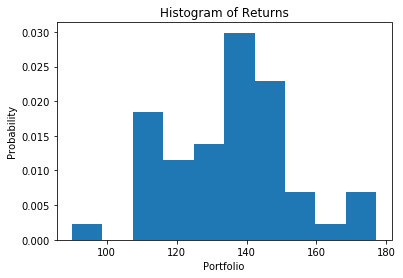

In [259]:
# Simulation
import numpy as np
import matplotlib.pyplot as plt
simu=50
T = 250
m=6
B=100 
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[x.value.item(0),x.value.item(1),x.value.item(2),x.value.item(3),x.value.item(4),x.value.item(5)]
    for i in range(T):
        rr=np.random.multivariate_normal(meanv,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

plt.hist(z_values, density=True )
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

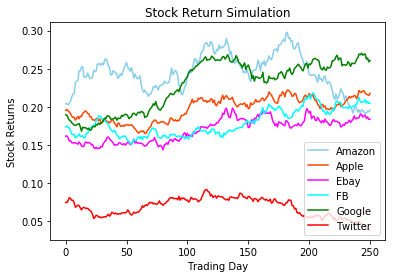

In [260]:
ydf = pd.DataFrame(y)
ydf.head(n=10)
T_range = range(0,251,1)
plt.plot(T_range,ydf[0], color='skyblue', label='Amazon')
plt.plot(T_range,ydf[1], color='orangered', label='Apple')
plt.plot(T_range,ydf[2], color='magenta', label='Ebay')
plt.plot(T_range,ydf[3], color='cyan', label='FB')
plt.plot(T_range,ydf[4], color='green', label='Google')
plt.plot(T_range,ydf[5], color='red', label='Twitter')
plt.xlabel('Trading Day')
plt.ylabel('Stock Returns')
plt.title('Stock Return Simulation')
plt.legend()
plt.show()

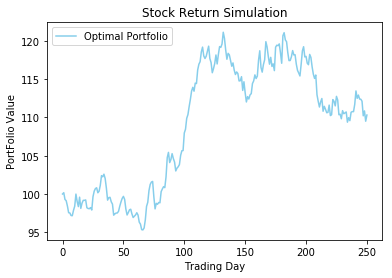

In [264]:
ydf2 = pd.DataFrame(y)
ydf2[6]=ydf[0]+ydf[1]+ydf[2]+ydf[4]+ydf[5]+ydf[3]
ydf2[7]=100*ydf2[6]
T_range = range(0,251,1)
plt.plot(T_range,ydf2[7], color='skyblue', label='Optimal Portfolio')
plt.xlabel('Trading Day')
plt.ylabel('PortFolio Value')
plt.title('Stock Return Simulation')
plt.legend()
plt.show()

Part c

In [280]:
Allo = []
for gamma in [0.1,0.15,0.2]:
    rr=sum_entries(mu*x)
    Exp_return= rr - gamma*quad_form(x, Cov)
    prob1 = Problem(Maximize(Exp_return), 
                   [sum_entries(x) == 1, 
                    x >= 0])
    prob1.solve()
    Allo.append(x.value.tolist())

In [281]:
Allodf = pd.DataFrame(Allo)

def values(list):
          for val in list: return np.round(val,16)
for i in range(0,6):
     Allodf[i]=Allodf[i].apply(lambda x:values(x))

In [283]:
Allodf

,0,1,2,3,4,5
0,1.0,1.545218e-08,1.473710e-08,5.023489e-09,1.063441e-08,1.486739e-08
1,1.0,7.690520e-09,7.191776e-09,2.447424e-09,4.995601e-09,7.916047e-09
2,1.0,5.310290e-09,4.855902e-09,2.000686e-09,3.314485e-09,5.944524e-09


In [284]:
def obj(x):
    o = norm(Q*x,2)
    return o

In [193]:
Q = np.linalg.cholesky(Cov)

In [194]:
Allo2 = []
for gamma in [0.1,0.15,0.2]:
    Exp_return= x.T*mu.T - gamma*sqrt(obj(x))
    prob1 = Problem(Maximize(Exp_return), 
                constraints=[sum_entries(x) == 1, 
                    x >= 0])
    prob1.solve()
    Allo2.append(x.values.tolist())

DCPError: Problem does not follow DCP rules.

In [158]:
mu.shape

(1L, 6L)

In [166]:
type(x),x

(cvxpy.expressions.variables.variable.Variable, Variable(6, 1))

In [175]:
x.T

Expression(AFFINE, UNKNOWN, (1, 6))

In [176]:
Cov.shape

(6L, 6L)

In [177]:
l=np.dot(x.T,Cov)

In [178]:
l.shape

(6L, 6L)

In [181]:
sqrt(np.dot(np.dot(x.T,Cov),x))

ValueError: setting an array element with a sequence.

In [285]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
T = 300
m=6
B=100
y = np.zeros((T+1,m))
y[0]=[x.value.item(0),x.value.item(1),x.value.item(2),x.value.item(3),x.value.item(4),x.value.item(5)]
for i in range(T):
    rr=np.random.multivariate_normal(meanv,Cov)
    y[i+1]=y[i]*(1+rr)
sum(y[T])*B

176.80493302831707

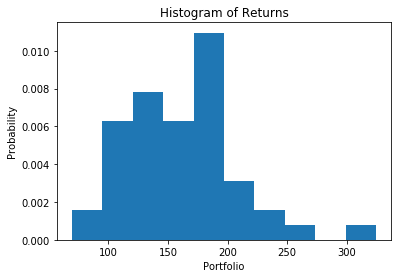

In [286]:
# Simulation
import numpy as np
import matplotlib.pyplot as plt
simu=50
T = 250
m=6
B=100 
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[x.value.item(0),x.value.item(1),x.value.item(2),x.value.item(3),x.value.item(4),x.value.item(5)]
    for i in range(T):
        rr=np.random.multivariate_normal(meanv,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

plt.hist(z_values, density=True )
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

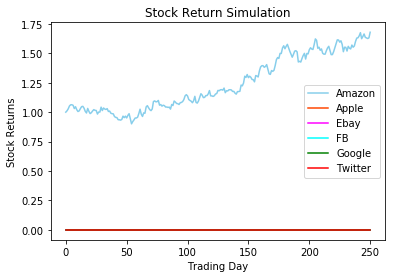

In [287]:
ydf = pd.DataFrame(y)
ydf.head(n=10)
T_range = range(0,251,1)
plt.plot(T_range,ydf[0], color='skyblue', label='Amazon')
plt.plot(T_range,ydf[1], color='orangered', label='Apple')
plt.plot(T_range,ydf[2], color='magenta', label='Ebay')
plt.plot(T_range,ydf[3], color='cyan', label='FB')
plt.plot(T_range,ydf[4], color='green', label='Google')
plt.plot(T_range,ydf[5], color='red', label='Twitter')
plt.xlabel('Trading Day')
plt.ylabel('Stock Returns')
plt.title('Stock Return Simulation')
plt.legend()
plt.show()

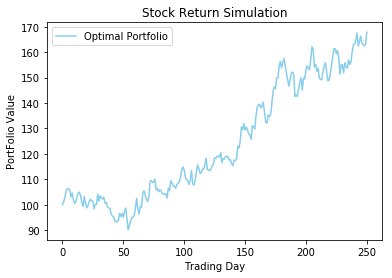

In [288]:
ydf2 = pd.DataFrame(y)
ydf2[6]=ydf[0]+ydf[1]+ydf[2]+ydf[4]+ydf[5]+ydf[3]
ydf2[7]=100*ydf2[6]
T_range = range(0,251,1)
plt.plot(T_range,ydf2[7], color='skyblue', label='Optimal Portfolio')
plt.xlabel('Trading Day')
plt.ylabel('PortFolio Value')
plt.title('Stock Return Simulation')
plt.legend()
plt.show()

The Allocation is different because when maximizing return, we are only setting a risk tolerance while focusing on return, which is why the allocation is for a single stock. 

Part 2

In [265]:
import pandas as pd
Data2 = pd.read_csv(r"C:\Users\Neha\Downloads\datahomework2.csv")

In [266]:
Data2 = Data2.iloc[399:]

In [267]:
Data2.shape

(400, 6)

In [268]:
Data2['Amz_return']=Data2['Amazon'].pct_change(fill_method='ffill')
Data2['Apl_return']=Data2['Apple'].pct_change(fill_method='ffill')
Data2['Ebay_return']=Data2['Ebay'].pct_change(fill_method='ffill')
Data2['FB_return']=Data2['Facebook'].pct_change(fill_method='ffill')
Data2['Ggl_return']=Data2['Google'].pct_change(fill_method='ffill')
Data2['Twtr_return']=Data2['Twitter'].pct_change(fill_method='ffill')

In [269]:
dx1 = Data2['Amz_return'].apply(lambda x:x+1)
dx2= Data2['Apl_return'].apply(lambda x:x+1)
dx3 = Data2['Ebay_return'].apply(lambda x:x+1)
dx4 = Data2['FB_return'].apply(lambda x:x+1)
dx5 = Data2['Ggl_return'].apply(lambda x:x+1)
dx6 = Data2['Twtr_return'].apply(lambda x:x+1)

In [270]:
meanv2=[gmean(dx1[1:])-1,gmean(dx2[1:])-1,gmean(dx3[1:])-1,gmean(dx4[1:])-1,gmean(dx5[1:])-1,\
      gmean(dx6[1:])-1]
meanv2

[0.0014643013426303142,
 0.0012608077573945664,
 0.00080563270296596379,
 0.00098041515941882373,
 0.00087320254110712092,
 0.0015031838880255055]

In [271]:
Datamat2 = Data2.iloc[1:,6:12]

covmat2 = Datamat2.as_matrix()

covmat2.shape

covar2 = np.cov(covmat2.T)

covdf2=pd.DataFrame(covar2,columns=['Amzn','Apl','Ebay','FB','Ggl','Twttr'])
covdf2

,Amzn,Apl,Ebay,FB,Ggl,Twttr
0,2.300889e-04,-0.000010,-3.671181e-07,-0.000002,-9.316624e-07,-0.000034
1,-9.806561e-06,0.000140,6.598452e-06,0.000003,6.913915e-06,-0.000011
2,-3.671181e-07,0.000007,2.367480e-04,-0.000013,1.879560e-06,-0.000026
3,-2.030911e-06,0.000003,-1.321101e-05,0.000159,2.138099e-05,-0.000002
4,-9.316624e-07,0.000007,1.879560e-06,0.000021,1.224945e-04,-0.000005
5,-3.373240e-05,-0.000011,-2.619704e-05,-0.000002,-5.323035e-06,0.001004


In [272]:
mu2=matrix(meanv2)
Cov2=matrix(covar2)
x=cvx.Variable(6)


risk=quad_form(x, Cov2)
rr=sum_entries(mu2*x)
prob1 = Problem(Minimize(risk ), 
               [rr>=R,sum_entries(x) == 1, 
                x >= 0])
prob1.solve()
print(x.value)

[[ 0.16300095]
 [ 0.22955332]
 [ 0.14732037]
 [ 0.18900779]
 [ 0.22480208]
 [ 0.04631549]]


In [273]:
T = 300
m=6
B=100
y = np.zeros((T+1,m))
y[0]=[x.value.item(0),x.value.item(1),x.value.item(2),x.value.item(3),x.value.item(4),x.value.item(5)]
for i in range(T):
    rr=np.random.multivariate_normal(meanv2,Cov2)
    y[i+1]=y[i]*(1+rr)
sum(y[T])*B

160.00634948450335

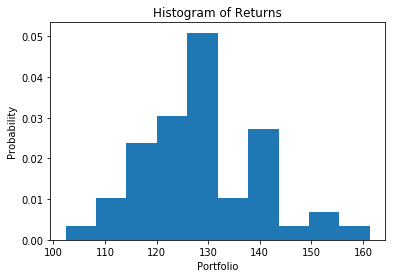

In [277]:
# Simulation
import numpy as np
import matplotlib.pyplot as plt
simu=50
T = 250
m=6
B=100 
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[x.value.item(0),x.value.item(1),x.value.item(2),x.value.item(3),x.value.item(4),x.value.item(5)]
    for i in range(T):
        rr=np.random.multivariate_normal(meanv2,Cov2)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

plt.hist(z_values, density=True )
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

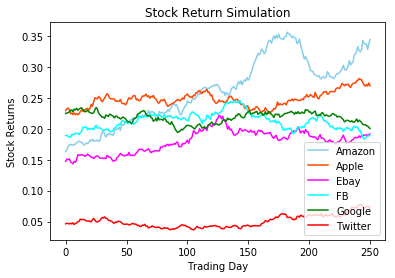

In [278]:
ydf = pd.DataFrame(y)
ydf.head(n=10)
T_range = range(0,251,1)
plt.plot(T_range,ydf[0], color='skyblue', label='Amazon')
plt.plot(T_range,ydf[1], color='orangered', label='Apple')
plt.plot(T_range,ydf[2], color='magenta', label='Ebay')
plt.plot(T_range,ydf[3], color='cyan', label='FB')
plt.plot(T_range,ydf[4], color='green', label='Google')
plt.plot(T_range,ydf[5], color='red', label='Twitter')
plt.xlabel('Trading Day')
plt.ylabel('Stock Returns')
plt.title('Stock Return Simulation')
plt.legend()
plt.show()

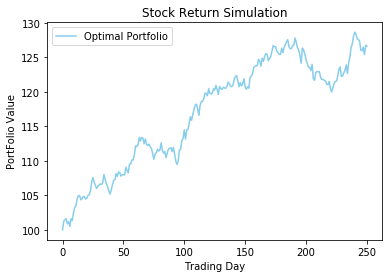

In [279]:
ydf2 = pd.DataFrame(y)
ydf2[6]=ydf[0]+ydf[1]+ydf[2]+ydf[4]+ydf[5]+ydf[3]
ydf2[7]=100*ydf2[6]
T_range = range(0,251,1)
plt.plot(T_range,ydf2[7], color='skyblue', label='Optimal Portfolio')
plt.xlabel('Trading Day')
plt.ylabel('PortFolio Value')
plt.title('Stock Return Simulation')
plt.legend()
plt.show()

Part 2 Part b

In [306]:
Allo = []
for gamma in [0.1,0.15,0.2]:
    rr=sum_entries(mu2*x)
    Exp_return= rr - gamma*quad_form(x, Cov2)
    prob1 = Problem(Maximize(Exp_return), 
                   [sum_entries(x) == 1, 
                    x >= 0])
    prob1.solve()
    Allo.append(x.value.tolist())

In [307]:
Allodf = pd.DataFrame(Allo)

def values(list):
          for val in list: return np.round(val,16)
for i in range(0,6):
     Allodf[i]=Allodf[i].apply(lambda x:values(x))

In [322]:
Allodf

,0,1,2,3,4,5
0,0.647898,5.004163e-09,4.153381e-09,3.014599e-09,3.878702e-09,0.352102
1,0.697784,5.150558e-08,1.099801e-08,9.647515e-09,1.056625e-08,0.302216
2,0.722636,8.645693e-08,1.704552e-08,2.222525e-08,1.850183e-08,0.277364


In [309]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
T = 300
m=6
B=100
y = np.zeros((T+1,m))
y[0]=[x.value.item(0),x.value.item(1),x.value.item(2),x.value.item(3),x.value.item(4),x.value.item(5)]
for i in range(T):
    rr=np.random.multivariate_normal(meanv2,Cov2)
    y[i+1]=y[i]*(1+rr)
sum(y[T])*B

150.37914284165893

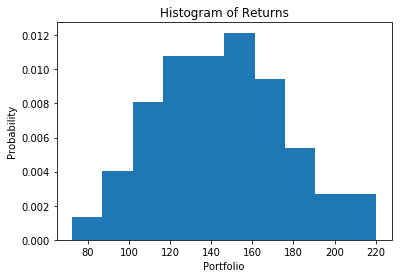

In [310]:
# Simulation
import numpy as np
import matplotlib.pyplot as plt
simu=50
T = 250
m=6
B=100 
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[x.value.item(0),x.value.item(1),x.value.item(2),x.value.item(3),x.value.item(4),x.value.item(5)]
    for i in range(T):
        rr=np.random.multivariate_normal(meanv2,Cov2)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

plt.hist(z_values, density=True )
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

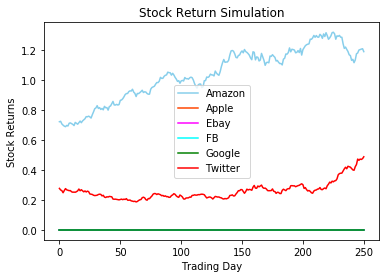

In [311]:
ydf = pd.DataFrame(y)
ydf.head(n=10)
T_range = range(0,251,1)
plt.plot(T_range,ydf[0], color='skyblue', label='Amazon')
plt.plot(T_range,ydf[1], color='orangered', label='Apple')
plt.plot(T_range,ydf[2], color='magenta', label='Ebay')
plt.plot(T_range,ydf[3], color='cyan', label='FB')
plt.plot(T_range,ydf[4], color='green', label='Google')
plt.plot(T_range,ydf[5], color='red', label='Twitter')
plt.xlabel('Trading Day')
plt.ylabel('Stock Returns')
plt.title('Stock Return Simulation')
plt.legend()
plt.show()

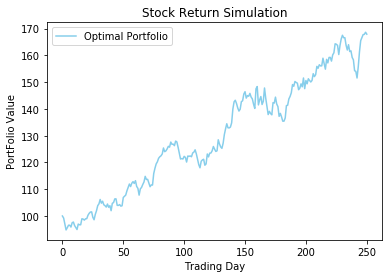

In [312]:
ydf2 = pd.DataFrame(y)
ydf2[6]=ydf[0]+ydf[1]+ydf[2]+ydf[4]+ydf[5]+ydf[3]
ydf2[7]=100*ydf2[6]
T_range = range(0,251,1)
plt.plot(T_range,ydf2[7], color='skyblue', label='Optimal Portfolio')
plt.xlabel('Trading Day')
plt.ylabel('PortFolio Value')
plt.title('Stock Return Simulation')
plt.legend()
plt.show()

The Allocation is different because when maximizing return, we are only setting a risk tolerance while focusing on return, which is why the allocation is for only two stock. 

The Allocation is different because when considering different range of days, the average return and variance covariance differs. In the second case when we take more recent data, we allocate to two stocks when maximizing return. 